# Model voor tb231c Tentamen - ABM gedeelte
_8 Dec 2021, 13:30 - 16:30, online_

Vul je naam en je studienummer in de variabelen in de onderstaande cel, let op dat je de aanhalingstekens om je naam en studienummer laat staan.

In [3]:
student_name = "Xiaodong Scherpbier"
student_number = "5171040"

## Tentameninstructies
* Tentamenvragen, die uniek zijn voor elk student, en het antwoordblad zijn te vinden op de Work2Grade pagina.
* In dit jupyter notebook vind je het model waar de vragen over gaan en je gebruikt het als werkplek om je vragen op te lossen.
* Vul je antwoorden in op het antwoordblad.
* Inleveren op brightspace :
  * Tentamenvragen
  * Antwoordblad
  * Jupyter notebook

    
## Het model
In dit tentamen werken we met het "Forest Fire model". Dit model beschrijft hoe een brand zich verplaatst door een bos.


In [4]:
# Code cel 1

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import Grid
from mesa.datacollection import DataCollector

In [9]:
# Code cel 2
# Model visualisation code

def visualize_model(model, vraag = "1"):
    color_map = {
        "Empty":0,
        "Fine":1,
        "On Fire": 2,
        "Burned Out":3
    }
    
    fig, ax = plt.subplots(1,2,figsize=(20, 10),facecolor=(1, 1, 1),tight_layout=True)
    
    title_text = "Tentamen tb231c 8 Dec 2021, vraag " + vraag + "\n" +  student_name + " " + student_number + " Height= " + str(model.grid.height) + " Width= " + str(model.grid.width) + " fire_start=" + model.fire_start + " t= " + str(model.schedule.steps)
    fig.suptitle(title_text)

    filename =  "plot_van" + vraag + "_" + student_name + "_" + student_number + "Height=" + str(model.grid.height) + "Width=" + str(model.grid.width) + " fire_start=" + model.fire_start + "t= " + str(model.schedule.steps)
    myColors = ('grey','green','red','black')
    colors = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    ax[0].set_aspect('equal')
    
    grid = np.zeros((model.grid.height, model.grid.width))
    for agent in model.schedule.agents :
        grid[agent.pos] = color_map.get(agent.condition)
    
    ax[0] = sns.heatmap(grid, ax=ax[0], cmap=colors, linewidths = 1, linecolor='black',cbar=True)
    colorbar = ax[0].collections[0].colorbar
    colorbar.set_ticks([0,1,2,3,4])
    colorbar.set_ticklabels(['Empty', 'Fine', 'On Fire','Burned Out'])
    
    results = fire.datacollector.get_model_vars_dataframe()

    ax[1] = sns.lineplot(data = results, ax=ax[1])
    ax[1].set_xlabel("Steps")
    ax[1].set_ylabel("Number of trees")
    plt.savefig(filename+".png", dpi=100,bbox_inches='tight')

In [37]:
# Code cel 3
# Model
class TreeCell(Agent):

    def __init__(self, pos, model):
        super().__init__(pos, model)
        self.pos = pos
        self.condition = "Fine"

    def step(self):
        if self.condition == "On Fire":
            for neighbor in self.model.grid.neighbor_iter(self.pos):
                if neighbor.condition == "Fine":
                    neighbor.condition = "On Fire"
            self.condition = "Burned Out"            
            
            
class ForestFire(Model):

    def __init__(self, height=100, width=100, density=0.65, fire_start="first row"):
        # Set up model objects
        self.schedule = RandomActivation(self)
        self.grid = Grid(height, width, torus=False)
        self.fire_start = fire_start

        self.datacollector = DataCollector(
            {
                "Fine": lambda m: self.count_type(m, "Fine"),
                "On Fire": lambda m: self.count_type(m, "On Fire"),
                "Burned Out": lambda m: self.count_type(m, "Burned Out"),
            }
        )

        # Place a tree
        for (contents, x, y) in self.grid.coord_iter():
            if self.random.random() < density:
                # Create a tree
                new_tree = TreeCell((x, y), self)
                self.grid._place_agent((x, y), new_tree)
                self.schedule.add(new_tree)
                
        # start the fire somewhere
        if fire_start == "first row":
            for a in self.schedule.agents :
                    if a.pos[0] == 0 :
                        a.condition = "On Fire"
                        
        if fire_start == "corner":
            self.schedule.agents[0].condition = "On Fire"
            
        if fire_start == "middle":
            trees_to_pick = []
            r = 1
            while len(trees_to_pick) == 0:
                trees_to_pick = self.grid.get_neighbors((int(self.grid.height/2),int(self.grid.width/2)), moore = True, radius = r)
                r = r +1
            self.random.choice(trees_to_pick).condition = "On Fire"
            
        if fire_start == "random":
            self.random.choice(self.schedule.agents).condition = "On Fire"
        
    def step(self):
        self.schedule.step()
        # collect data
    self.datacollector.collect(self)
        
    def run(self,stp=20):

        for i in range(stp):
            self.step()


    @staticmethod
    def count_type(model, tree_condition):
        count = 0
        for tree in model.schedule.agents:
            if tree.condition == tree_condition:
                count += 1
        return count

NameError: name 'self' is not defined

In [31]:
fire = ForestFire(density = .7, fire_start="first row" )
fire.run()

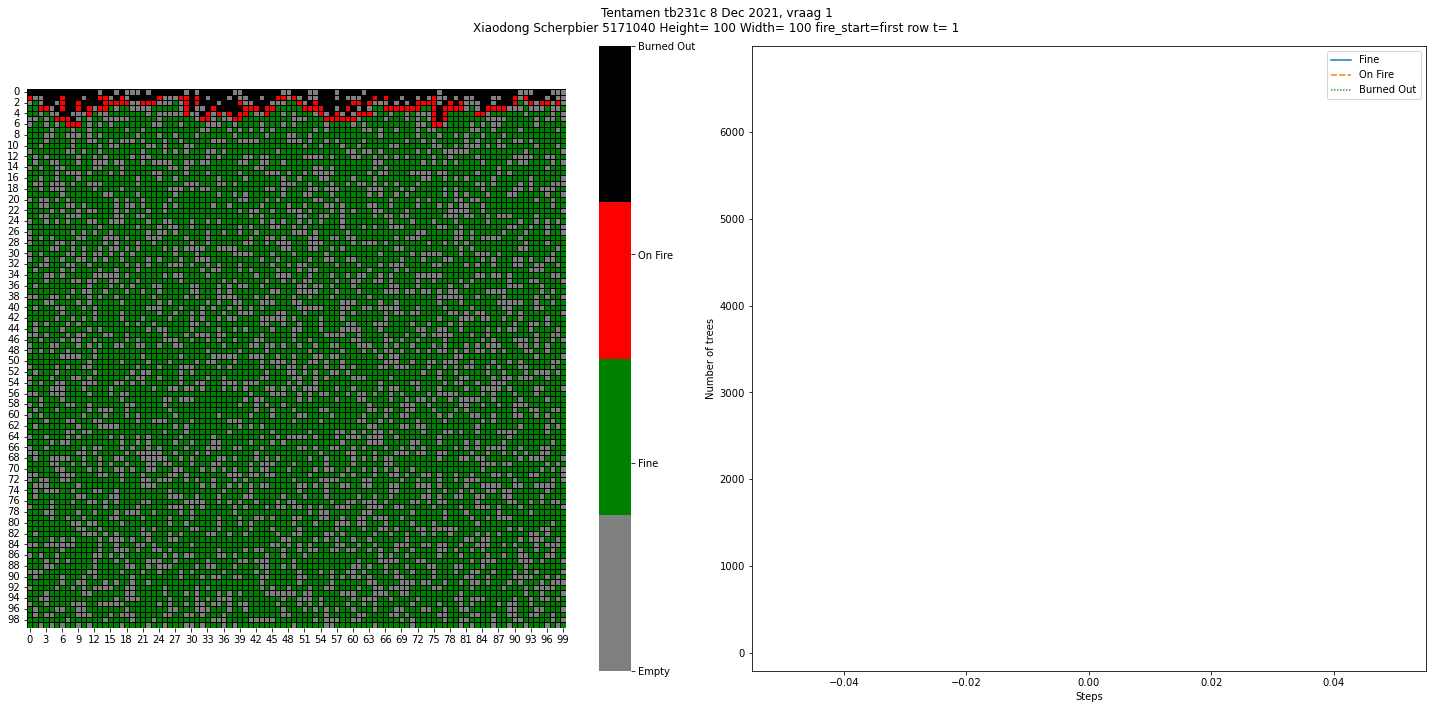

In [32]:
visualize_model(fire,"1")

In [44]:
s = np.random.uniform(1,100)
s

31.617614174682533